In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from IPython.display import display, Math, Latex

Populating the interactive namespace from numpy and matplotlib


(1)$$\begin{equation}
\Phi _{M} (R,z) = -\frac{GM}{\sqrt{R^{2} + (a + \sqrt{z^2 + b^2})^{2}}}
\end{equation}$$

(2)$$\begin{equation}
\rho _{M} (R,z) = \frac{b^{2}M}{4\pi} \frac{aR^{2} + (a + 3\sqrt{z^{2} + b^{2}})(a+ \sqrt{z^{2} + b^{2}})^{2}}{(R^{2} + (a + \sqrt{z^2 + b^2})^{2})^{5/2}(z^{2} + b^{2})^{3/2}}
\end{equation}$$

Con  densidades iguales y con $b/a = 0.2$, $b/a = 1.$ y $b/a = 5.$ respectivamente y tomando tanto al potencial como a la densidad de la siguiente forma

(3)$$\begin{equation}
\frac{a\Phi_{M}}{GM} = \frac{-1}{\sqrt{(R/a)^{2} + (1 + \sqrt{(z/a)^{2} + (b/a)^{2}})^{2}}}
\end{equation}$$

(4)$$\begin{equation}
\frac{4\pi \rho_{M} a^{5}}{b^{2}M} = \frac{(R/a)^{2} + (1+3\sqrt{(z/a)^{2} + (b/a)^{2}})(1+\sqrt{(z/a)^{2} + (b/a)^{2}})^{2}}{((R/a)^{2} + (1 + \sqrt{(z/a)^{2} + (b/a)^{2}})^{2})^{5/2}((z/a)^{2} + (b/a)^{2})^{3/2}}
\end{equation}$$

In [5]:
R = np.linspace(-10.,10.,100)
z = np.linspace(-10.,10.,100)

In [8]:
#constantes
G = 4.302e-3 #pcSM(km/s)**2
M = 0.1

In [2]:
#Funcion para calcular el potencial de forma adimensional
def potencial_ad(R,z,a,b):
    d = np.sqrt((R/a)**2. + (1. + np.sqrt((z/a)**2. + (b/a)**2.))**2.)
    phi_ad = -1./d
    return phi_ad

In [3]:
def potencial(R,z,a,b):
    phi = G*M*potencial_ad(R,z,a,b)
    return phi

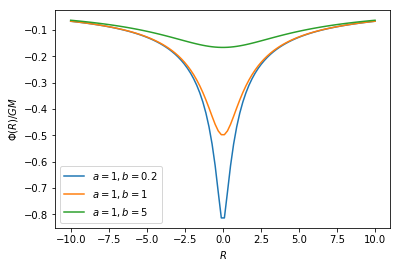

In [6]:
plt.plot(R, potencial_ad(R,z,a=1,b=0.2),label=r'$a = 1, b = 0.2$')
plt.plot(R, potencial_ad(R,z,a=1.,b=1.),label=r'$a = 1, b = 1$')
plt.plot(R, potencial_ad(R,z,a=1.,b=5.),label=r'$a = 1, b = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\Phi (R)/GM$')
plt.legend(loc='lower left', prop={'size':10})
plt.show()

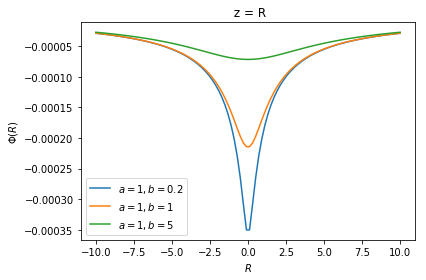

In [9]:
plt.plot(R, potencial(R,z,a=1,b=0.2),label=r'$a = 1, b = 0.2$')
plt.plot(R, potencial(R,z,a=1.,b=1.),label=r'$a = 1, b = 1$')
plt.plot(R, potencial(R,z,a=1.,b=5.),label=r'$a = 1, b = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\Phi (R)$')
plt.legend(loc='lower left', prop={'size':10})
plt.title(' z = R')
plt.show()

In [12]:
def densidad_ad(R,z,a,b):
    n = (R/a)**2. + (1. + 3.*np.sqrt((z/a)**2. + (b/a)**2.))*(1. + np.sqrt((z/a)**2. + (b/a)**2.))**2.
    d = ((R/a)**2. + (1. + np.sqrt((z/a)**2. + (b/a)**2.))**2.)**(5./2.) * ((z/a)**2. + (b/a)**2.)**(3./2.)
    rho_ad = n/d
    return rho_ad

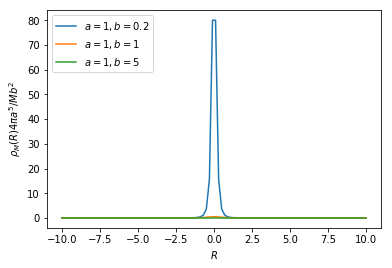

In [13]:
plt.plot(R, densidad_ad(R,z,a=1,b=0.2),label=r'$a = 1, b = 0.2$')
plt.plot(R, densidad_ad(R,z,a=1.,b=1.),label=r'$a = 1, b = 1$')
plt.plot(R, densidad_ad(R,z,a=1.,b=5.),label=r'$a = 1, b = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{M} (R)4\pi a^{5}/Mb^{2}$')
plt.legend(loc='upper left', prop={'size':10})
#plt.title(' z = R')
plt.show()

In [14]:
def densidad(R,z,a,b):
    K = (M*b**2.)/(4.*np.pi*a**5.)
    rho = K*densidad_ad(R,z,a,b)
    return rho

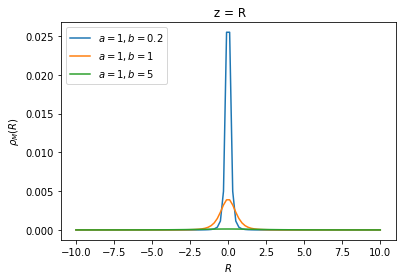

In [15]:
plt.plot(R, densidad(R,z,a=1,b=0.2),label=r'$a = 1, b = 0.2$')
plt.plot(R, densidad(R,z,a=1.,b=1.),label=r'$a = 1, b = 1$')
plt.plot(R, densidad(R,z,a=1.,b=5.),label=r'$a = 1, b = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{M} (R)$')
plt.legend(loc='upper left', prop={'size':10})
plt.title(' z = R')
plt.show()

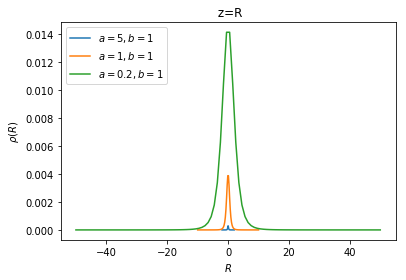

In [16]:
plt.plot(R/5., densidad(R,z,a=5.,b=1.),label=r'$a = 5, b = 1$')
plt.plot(R/1., densidad(R,z,a=1.,b=1.),label=r'$a = 1, b = 1$')
plt.plot(R/0.2, densidad(R,z,a=0.2,b=1.),label=r'$a = 0.2, b = 1$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho (R)$')
plt.legend(loc='upper left', prop={'size':10})
plt.title(' z=R')
plt.show()

In [14]:
R_1,z_1 = np.meshgrid(R,z)

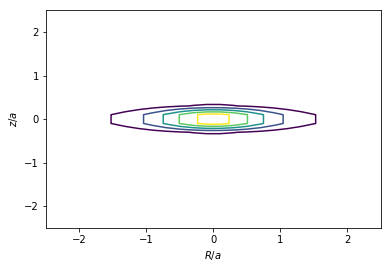

In [24]:
a = 1.
plt.contour(R_1/a,z_1/a,densidad_nor(R_1,z_1,a=1,b=0.2))
xlabel(r'$R/a$')
ylabel(r'$z/a$')
xlim(-2.5,2.5)
ylim(-2.5,2.5)
plt.title(r'$a = 1, b=0.2$')
plt.show()

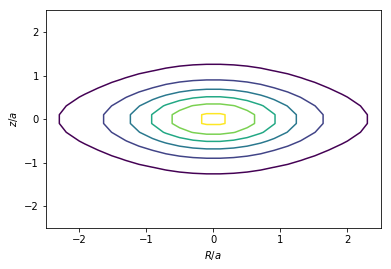

In [25]:
a = 1.
plt.contour(R_1/a,z_1/a,densidad_nor(R_1,z_1,a=1.,b=1.))
xlabel(r'$R/a$')
ylabel(r'$z/a$')
xlim(-2.5,2.5)
ylim(-2.5,2.5)
plt.title(r'$a = 1, b=1$')
plt.show()

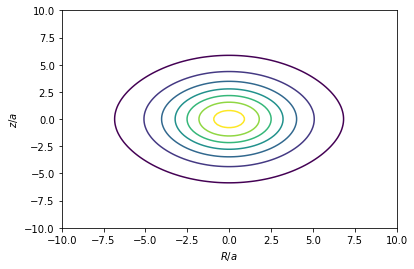

In [17]:
a = 1.
plt.contour(R_1/a,z_1/a,densidad_nor(R_1,z_1,a=1.,b=5.))
xlabel(r'$R/a$')
ylabel(r'$z/a$')
plt.title(r'$a = 1, b=5$')
plt.show()

In [18]:
from galpy import potential
from galpy.util import bovy_plot

/home/atarockz/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)



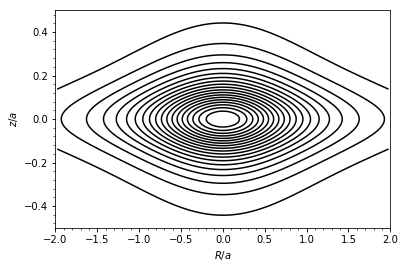

In [19]:
#amp=M*G
mnp= potential.MiyamotoNagaiPotential(amp=10.,a=1.,b=0.2)
mnp.plotDensity(justcontours=True,rmin=-2.,rmax=2.,nrs=100,nzs=100)
xlabel(r'$R/a$')
ylabel(r'$z/a$');

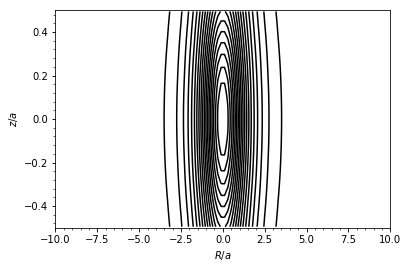

In [20]:
mnp= potential.MiyamotoNagaiPotential(amp=10.,a=1.,b=1.)
mnp.plotDensity(justcontours=True,rmin=-10.,rmax=10.,nrs=100,nzs=100)
xlabel(r'$R/a$')
ylabel(r'$z/a$');

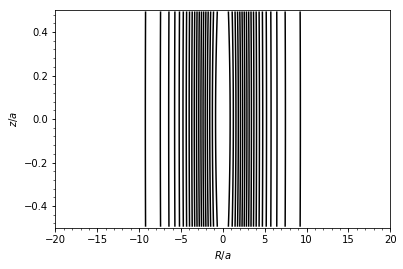

In [21]:
mnp= potential.MiyamotoNagaiPotential(amp=10.,a=1.,b=5.)
mnp.plotDensity(justcontours=True,rmin=-20.,rmax=20.,nrs=100,nzs=100)
xlabel(r'$R/a$')
ylabel(r'$z/a$');